In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class KMeansCustom:
    def __init__(self,k=2):
        self.k=k
    def fit(self,x,iteration=100,tolerance=0.01):
        self.centroid_final={}
#         print(self.k)
        n=len(x)//(self.k+1)
        for cluster in range(self.k):
            self.centroid_final[cluster]=x[cluster*n]
        print("Previous centroid:",self.centroid_final)
        
#         for g in x:
#             plt.scatter(g[0],g[1])
#         for h in self.centroid_final.values():
#             plt.scatter(h[0],h[1],c="red",s=200,marker="+")
#         plt.show()


        for rt in range(iteration):
            self.cluster_final={}
            for p in range(self.k):
                self.cluster_final[p]=[]
            for j in x:
                l=[]
                for k_cluster in range(self.k):
                    l.append(np.linalg.norm(self.centroid_final[k_cluster]-j))
                self.cluster_final[l.index(min(l))].append(j)
            new_centroid_final={}
            for cnt in self.cluster_final:
                new_centroid_final[cnt]=np.average(self.cluster_final[cnt],axis=0)
            
#             print("Current:",new_centroid_final)
            tol_sum=0
            for current_prev in self.centroid_final:
                tol_sum+=np.sum(self.centroid_final[current_prev]-new_centroid_final[current_prev])
            
            label=True
            print("Tolerence_"+str(rt),abs(tol_sum),tolerance)
            if(abs(tol_sum)>tolerance):
                for prev in self.centroid_final:
                    self.centroid_final[prev]=new_centroid_final[prev]
                label=False
                
            if label:
                break
#             for g in x:
#                 plt.scatter(g[0],g[1])
#             for h in self.centroid_final.values():
#                 plt.scatter(h[0],h[1],c="red",s=200,marker="+")
#             plt.show()
#             break
        print("Final centroid:",self.centroid_final)
    def predict(self,y):
        p_list=[]
        for k_cluster in range(self.k):
                    p_list.append(np.linalg.norm(self.centroid_final[k_cluster]-np.array(y)))
                    group=p_list.index(min(p_list))
        return group

In [3]:
from sklearn.datasets import load_iris

In [4]:
data=load_iris()
X=data['data'][:,[0,1]]

In [5]:
clf=KMeansCustom(k=3)

In [6]:
clf.fit(X,tolerance=0.001)

Previous centroid: {0: array([5.1, 3.5]), 1: array([4.9, 3.1]), 2: array([6.4, 2.9])}
Tolerence_0 0.1857006403994319 0.001
Tolerence_1 0.1241129560917913 0.001
Tolerence_2 0.1537280701754411 0.001
Tolerence_3 0.09359217171717082 0.001
Tolerence_4 0.054673659673658115 0.001
Tolerence_5 0.0182154554960392 0.001
Tolerence_6 0.10337743443850567 0.001
Tolerence_7 0.11247677119628197 0.001
Tolerence_8 0.14229271708683422 0.001
Tolerence_9 0.08412486533074937 0.001
Tolerence_10 0.028592291222760746 0.001
Tolerence_11 0.0 0.001
Final centroid: {0: array([5.006, 3.418]), 1: array([5.77358491, 2.69245283]), 2: array([6.81276596, 3.07446809])}


1


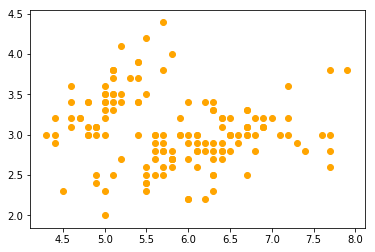

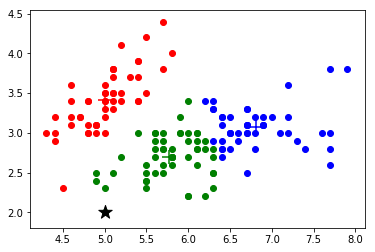

In [7]:
PREDICT=[5,2]
p=clf.predict(PREDICT)
print(p)

col=['r','g','b']

for pt in X:
    plt.scatter(pt[0],pt[1],c="orange")
plt.show()

for pt in clf.cluster_final:
    for h in clf.cluster_final[pt]:
        plt.scatter(h[0],h[1],c=col[pt])
    plt.scatter(clf.centroid_final[pt][0],clf.centroid_final[pt][1],c=col[pt],marker="+",s=200)
    
plt.scatter(PREDICT[0],PREDICT[1],marker="*",c="k",s=200)
plt.show()

In [8]:
clf.centroid_final

{0: array([5.006, 3.418]),
 1: array([5.77358491, 2.69245283]),
 2: array([6.81276596, 3.07446809])}

In [9]:
for c in clf.cluster_final.items():
    print(c)

(0, [array([5.1, 3.5]), array([4.9, 3. ]), array([4.7, 3.2]), array([4.6, 3.1]), array([5. , 3.6]), array([5.4, 3.9]), array([4.6, 3.4]), array([5. , 3.4]), array([4.4, 2.9]), array([4.9, 3.1]), array([5.4, 3.7]), array([4.8, 3.4]), array([4.8, 3. ]), array([4.3, 3. ]), array([5.8, 4. ]), array([5.7, 4.4]), array([5.4, 3.9]), array([5.1, 3.5]), array([5.7, 3.8]), array([5.1, 3.8]), array([5.4, 3.4]), array([5.1, 3.7]), array([4.6, 3.6]), array([5.1, 3.3]), array([4.8, 3.4]), array([5., 3.]), array([5. , 3.4]), array([5.2, 3.5]), array([5.2, 3.4]), array([4.7, 3.2]), array([4.8, 3.1]), array([5.4, 3.4]), array([5.2, 4.1]), array([5.5, 4.2]), array([4.9, 3.1]), array([5. , 3.2]), array([5.5, 3.5]), array([4.9, 3.1]), array([4.4, 3. ]), array([5.1, 3.4]), array([5. , 3.5]), array([4.5, 2.3]), array([4.4, 3.2]), array([5. , 3.5]), array([5.1, 3.8]), array([4.8, 3. ]), array([5.1, 3.8]), array([4.6, 3.2]), array([5.3, 3.7]), array([5. , 3.3])])
(1, [array([5.5, 2.3]), array([5.7, 2.8]), arr